In [1]:
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

In [6]:
class escenarios_zombies:
    def __init__(self, alfa, beta, zeta, rho=0, kappa=0, sigma=0, gamma=0, c=0, delta=0, pi=0):
        self.beta = beta
        self.alfa = alfa
        self.zeta = zeta
        self.rho = rho
        self.gamma = gamma
        
        self.kappa = kappa
        self.sigma = gamma
        
        self.c = c

        self.delta = delta
        self.pi = pi  
    
    def modelo_basico(self, y, t):
        """
        Modelo basico.
        """

        S = y[0]
        Z = y[1]
        R = y[2]

        dSdt = self.pi - self.beta*S*Z - self.delta*Z
        dZdt = self.beta*S*Z + self.zeta*R - self.alfa*S*Z 
        dRdt = self.delta*S + self.alfa*S*Z - self.zeta*R      
        
        return [dSdt, dZdt, dRdt]
    
    def modelo_infecciones_latentes(self, y, t):
        """
        Modelo con el periodo latente de infeccion
        """

        S = y[0]
        I = y[1]
        Z = y[2]
        R = y[3]

        dSdt = self.pi - self.beta*S*Z - self.delta*Z
        dIdt = self.beta*S*Z - self.rho*I - self.delta*I 
        dZdt = self.rho*I + self.zeta*R - self.alfa*S*Z 
        dRdt = self.delta*S + self.delta*I + self.alfa*S*Z - self.zeta*R 

        return [dSdt, dIdt, dZdt, dRdt]

    def modelo_cuarentena(self, y, t):
        """
        El modelo con cuarentena.
        """

        S = y[0]
        I = y[1]
        Z = y[2]
        R = y[3]
        Q = y[4]

        dSdt = self.pi - (self.beta * S * Z) - (self.delta * S)
        dIdt = (self.beta * S * Z) - (self.rho*I) - (self.delta*I) - (self.kappa * I)
        dZdt = (self.rho*I) + (self.zeta * R) - (self.alfa*S*Z) - (self.sigma*Z)
        dRdt = (self.delta * S) + (self.delta * I) + (self.alfa * S * Z) - (self.zeta*R) + (self.gamma * Q)
        
        dQdt = (self.kappa * I) + (self.sigma * Z)  - (self.gamma*Q)
        

        return [dSdt, dIdt, dZdt, dRdt, dQdt]

    
    def modelo_con_tratamiento(self, y, t):
        """
        El modelo con tratamiento.
        """

        S = y[0]
        I = y[1]
        Z = y[2]
        R = y[3]

        dSdt = self.pi - self.beta*S*Z - self.delta*Z + self.c*Z 
        dIdt = self.beta*S*Z - self.rho*I - self.delta*I
        dZdt = self.rho*I + self.zeta*R - self.alfa*S*Z - self.c*Z 
        dRdt = self.delta*S + self.delta*I + self.alfa*S*Z - self.zeta*R

        return [dSdt, dIdt, dZdt, dRdt]

    
    
    
    def correr_modelo_basico(self, N=500):
        condiciones_iniciales = [N, 0, 0]
        #[S, Z, R]
        numero_de_veces = linspace(0,20,100)

        #Usamos odeint en lugar de hacerlo manualmente con for
        #odeint(funcion a implementar, init es)
        solucion = odeint(self.modelo_basico, condiciones_iniciales, numero_de_veces, args=())
        plt.plot(numero_de_veces, solucion[:,0], label="Humanos (Susceptibles)")
        plt.plot(numero_de_veces, solucion[:,1], label="Zombies")
        plt.xlabel("Tiempo")
        plt.ylabel("Poblacion")
        plt.legend()
        plt.title("Modelo basico")
        plt.show()
        
                
    def correr_modelo_latente(self, N=500):
        condiciones_iniciales = [N, 0, 0, 0]
        #[S, I, Z, R]
        numero_de_veces = linspace(0,20,100)
        solucion = odeint(self.modelo_infecciones_latentes, condiciones_iniciales, numero_de_veces)
        plt.xlabel("Tiempo")
        plt.ylabel("Poblacion")
        plt.plot(numero_de_veces, solucion[:,0], label="Humanos (Susceptibles)")
        plt.plot(numero_de_veces, solucion[:,2], label="Zombies")
        plt.title("Modelo con Infecciones Latentes")
        plt.legend()
        plt.show()
        
    def correr_modelo_cuarentena(self, N=500):
        
        condiciones_iniciales = [N, 0, 0, 0, 0]
        #[S, I, Z, R, Q]
        numero_de_veces = linspace(0,20,100)
        solucion = odeint(self.modelo_cuarentena, condiciones_iniciales, numero_de_veces)
        plt.xlabel("Tiempo")
        plt.ylabel("Poblacion")
        plt.plot(numero_de_veces, solucion[:,0], label="Humanos (Susceptibles)")
        plt.plot(numero_de_veces, solucion[:,2], label="Zombies")
        plt.title("Modelo con Cuarentena")
        plt.legend()
        plt.show()        
        
    def correr_modelo_con_tratamiento(self, N=500):
        condiciones_iniciales = [N, 0, 0, 0]
        #[S, I, Z, R]
        numero_de_veces = linspace(0,20,100)
        solucion = odeint(self.modelo_con_tratamiento, condiciones_iniciales, numero_de_veces, args=())
        plt.xlabel("Tiempo")
        plt.ylabel("Poblacion")
        plt.plot(numero_de_veces, solucion[:,0], label="Humanos (Susceptibles)")
        plt.plot(numero_de_veces, solucion[:,2], label="Zombies")
        plt.title("Modelo con tratamiento")
        plt.legend()
        plt.show()


In [7]:
"""
Todos los valores son por periodo t

alfa = 0.005 #Tasa de muerte zombie (i.e., que tan probable es matar a un zombie en un encuentro con el)
beta = 0.002  #Infeccion por dia
c = 0.04 #tasa de curacion

delta = 0.0001 # la tasa de muerte natural/por causas no directamente atribuibles a encuentro con zombie
pi = 0 #Tasa de nacimiento

rho = 5 # Cuanto tarda un infectado en volverse zombie
zeta = 5 #que tan probable es que alguien que muere de S reviva como zombie

--tasas de cuarentena---
kappa = 0.005 # de infectados
sigma = 0.0095 # de zombies
gamma = 0.001 # intento de escape
"""

escenario_1 = escenarios_zombies(alfa= 0.005, beta=0.0028, c=0.05, delta=0.0001, pi=0, rho=5, zeta=5)
escenario_2 = escenarios_zombies(alfa= 0.0005, beta=0.001, c=0.1, delta=0.001, pi=1.2, rho=4, zeta=2)
escenario_3 = escenarios_zombies(alfa= 0.005, beta=0.0028, c=0, delta=0.0001, pi=0, rho=5, zeta=5,kappa=0.005, sigma=0.0095, gamma=0.0001)

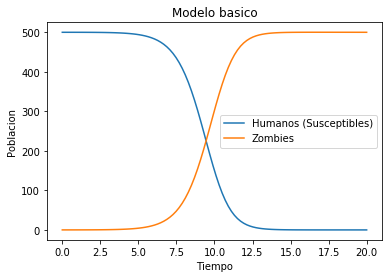

In [8]:
escenario_1.correr_modelo_basico()

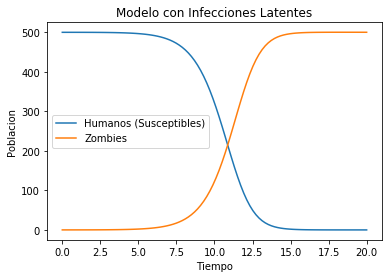

In [9]:
escenario_1.correr_modelo_latente()

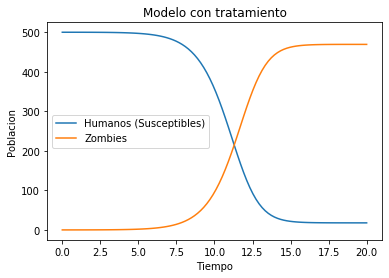

In [10]:
escenario_1.correr_modelo_con_tratamiento()

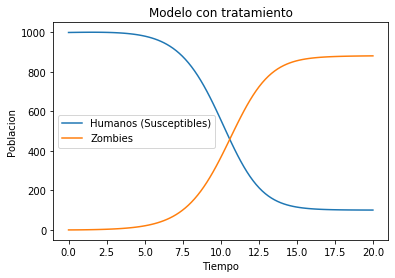

In [11]:
escenario_2.correr_modelo_con_tratamiento(1000)

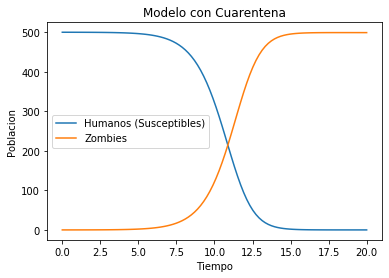

In [12]:
escenario_3.correr_modelo_cuarentena()